In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import math

import sys
sys.setrecursionlimit(5000)
import datetime

We also use time series as one of our baseline models. We try to take advantage of the seasonality of the bird observations in this model.

In [2]:
# gobs3 = open("Data/obs3.txt", "r")
gts = open("Data/ts.txt", "r")
# gagg3 = open("Data/agg3.txt", "r")
# obs3 = pd.read_csv(gobs3)
ts = pd.read_csv(gts)
# agg3 = pd.read_csv(gagg3)
print(ts)

gts.close()
# gobs3tt = open("Data/obs3_tuftit.txt", "r")
# gtstt = open("Data/ts_tuftit.txt", "r")
# gagg3tt = open("Data/agg3_tuftit.txt", "r")
# obs3tt = pd.read_csv(gobs3)
# tstt = pd.read_csv(gts)
# agg3tt = pd.read_csv(gagg3tt)

# def diff(row):
#     return datetime.date(int(row["YEAR"]),int(row["MONTH"]),int(row["DAY"])) - datetime.date(2017,1,1)

# ts["ds"] = ts.apply(diff,axis=1)
# ts = ts.drop(["DAY","MONTH","YEAR"],axis=1)
# print(agg3)

# agg3tt["ds"] = agg3tt.apply(diff,axis=1)
# agg3tt = agg3tt.drop(["DAY","MONTH","YEAR"],axis=1)
# print(agg3tt)

# agg3both = pd.concat([agg3,agg3tt])
# pd.set_option('display.max_columns', 6)
# print(agg3)
# print(agg3tt)
# print(agg3both)

# z = open("Data/aggthree.txt", "a")
# z.write(agg3.to_csv())
# z.close()

         LATITUDE  LONGITUDE    ds  AVGOBS
0              28        -97     0     0.0
1              28        -97     1    11.0
2              28        -97     2     0.0
3              28        -97     3     0.0
4              28        -97     4     6.0
...           ...        ...   ...     ...
1687615        49        -68  2552     0.0
1687616        49        -68  2553     0.0
1687617        49        -68  2554     0.0
1687618        49        -68  2555     0.0
1687619        49        -68  2556     0.0

[1687620 rows x 4 columns]


In [3]:
from statsmodels.tsa.api import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [4]:
data = ts[ts["LATITUDE"] == 41]
data = data[data["LONGITUDE"] == -92]
data = data[["ds","AVGOBS"]]
data['ws'] = data.apply(lambda x : x['ds'] //7, axis = 1)


print(data)

def newdate(row):
    return pd.to_datetime(datetime.timedelta(days = row["ds"])+datetime.date(2017,1,1))

data["dsreal"] = data.apply(newdate,axis=1)

databd = data.copy()
databd.index = databd["dsreal"]

databw = data.copy()
databw = databw.drop(['ds','dsreal'], axis = 1)
databw = databw.groupby('ws').mean()

print(databd)
print(databw)



           ds    AVGOBS     ws
1010015     0  0.000000    0.0
1010016     1  3.666667    0.0
1010017     2  2.375000    0.0
1010018     3  0.000000    0.0
1010019     4  5.666667    0.0
...       ...       ...    ...
1012567  2552  2.000000  364.0
1012568  2553  1.500000  364.0
1012569  2554  2.500000  364.0
1012570  2555  1.600000  365.0
1012571  2556  2.333333  365.0

[2557 rows x 3 columns]
              ds    AVGOBS     ws     dsreal
dsreal                                      
2017-01-01     0  0.000000    0.0 2017-01-01
2017-01-02     1  3.666667    0.0 2017-01-02
2017-01-03     2  2.375000    0.0 2017-01-03
2017-01-04     3  0.000000    0.0 2017-01-04
2017-01-05     4  5.666667    0.0 2017-01-05
...          ...       ...    ...        ...
2023-12-28  2552  2.000000  364.0 2023-12-28
2023-12-29  2553  1.500000  364.0 2023-12-29
2023-12-30  2554  2.500000  364.0 2023-12-30
2023-12-31  2555  1.600000  365.0 2023-12-31
2024-01-01  2556  2.333333  365.0 2024-01-01

[2557 rows x 4 co

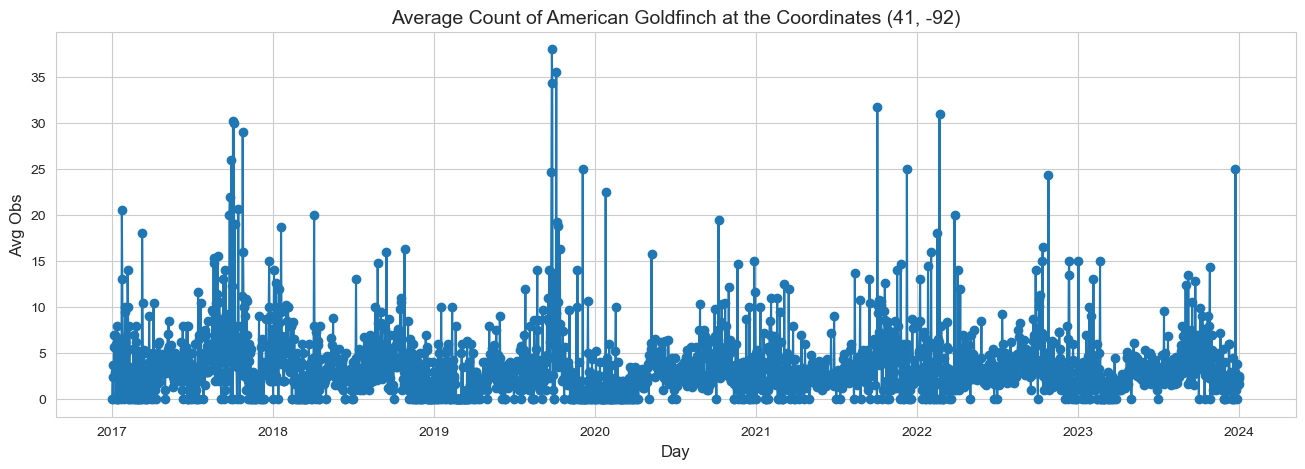

In [5]:
plt.figure(figsize=(16,5))

plt.plot(databd.index, databd.AVGOBS, '-o')

plt.xlabel("Day", fontsize=12)
plt.ylabel("Avg Obs", fontsize=12)

plt.title(f"Average Count of American Goldfinch at the Coordinates (41, -92)", fontsize=14)

plt.show()

<Figure size 1600x500 with 0 Axes>

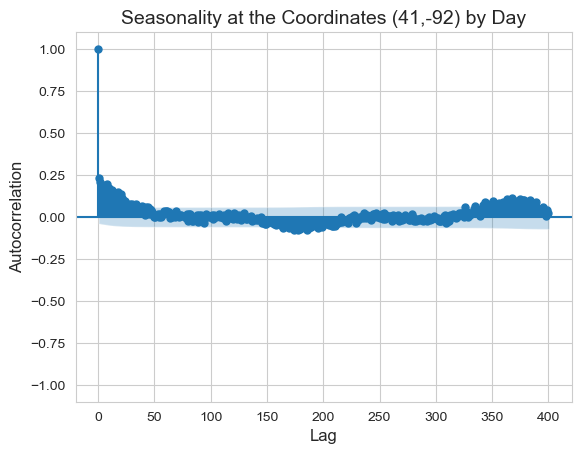

In [6]:
plt.figure(figsize=(16,5))

sm.graphics.tsa.plot_acf(databd.AVGOBS,lags=400)
plt.ylim(-1.1,1.1)


plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

plt.title(f"Seasonality at the Coordinates (41,-92) by Day", fontsize=14)

plt.show()

<Figure size 1600x500 with 0 Axes>

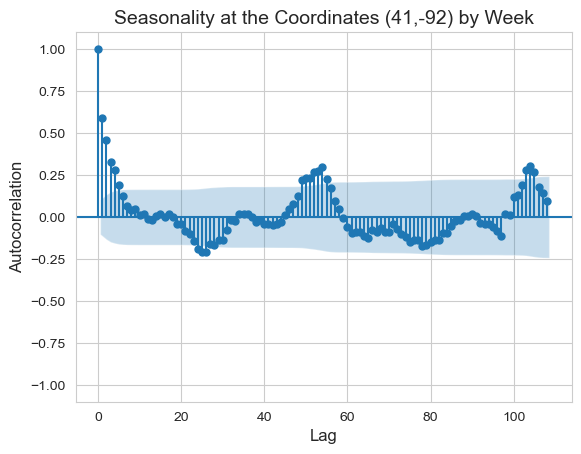

In [7]:
plt.figure(figsize=(16,5))

sm.graphics.tsa.plot_acf(databw.AVGOBS,lags=108)
plt.ylim(-1.1,1.1)


plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

plt.title(f"Seasonality at the Coordinates (41,-92) by Week", fontsize=14)

plt.show()

In [8]:
databd_train = databd.iloc[0:728].copy()
databd_test = databd.iloc[728:1092].copy()
print(databd_train)
print(databd_test)

databw_train = databw.iloc[0:104].copy()
databw_test = databw.iloc[104:156].copy()
print(databw_train)
print(databw_test)


             ds    AVGOBS     ws     dsreal
dsreal                                     
2017-01-01    0  0.000000    0.0 2017-01-01
2017-01-02    1  3.666667    0.0 2017-01-02
2017-01-03    2  2.375000    0.0 2017-01-03
2017-01-04    3  0.000000    0.0 2017-01-04
2017-01-05    4  5.666667    0.0 2017-01-05
...         ...       ...    ...        ...
2018-12-25  723  0.000000  103.0 2018-12-25
2018-12-26  724  2.000000  103.0 2018-12-26
2018-12-27  725  0.000000  103.0 2018-12-27
2018-12-28  726  0.000000  103.0 2018-12-28
2018-12-29  727  3.000000  103.0 2018-12-29

[728 rows x 4 columns]
              ds    AVGOBS     ws     dsreal
dsreal                                      
2018-12-30   728  4.000000  104.0 2018-12-30
2018-12-31   729  0.000000  104.0 2018-12-31
2019-01-01   730  0.000000  104.0 2019-01-01
2019-01-02   731  1.428571  104.0 2019-01-02
2019-01-03   732  1.000000  104.0 2019-01-03
...          ...       ...    ...        ...
2019-12-24  1087  0.000000  155.0 2019-12-24

In [9]:
naive_dict = { i : databw.AVGOBS[i - 52] for i in range(104,156)} 
avg_dict = {i: (databw.AVGOBS[i-52] + databw.AVGOBS[i-104])/2 for i in range(104,156)}




In [10]:
sarima = SARIMAX(databw_train.AVGOBS,order=(1,0,1), seasonal_order=(1, 1, 1, 52))
fitted_sarima = sarima.fit()
preds = fitted_sarima.forecast(52)
sarima_dict = {i : preds[i] for i in range(104,156)}

C:\Users\corpt\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\corpt\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\corpt\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\corpt\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\corpt\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mod

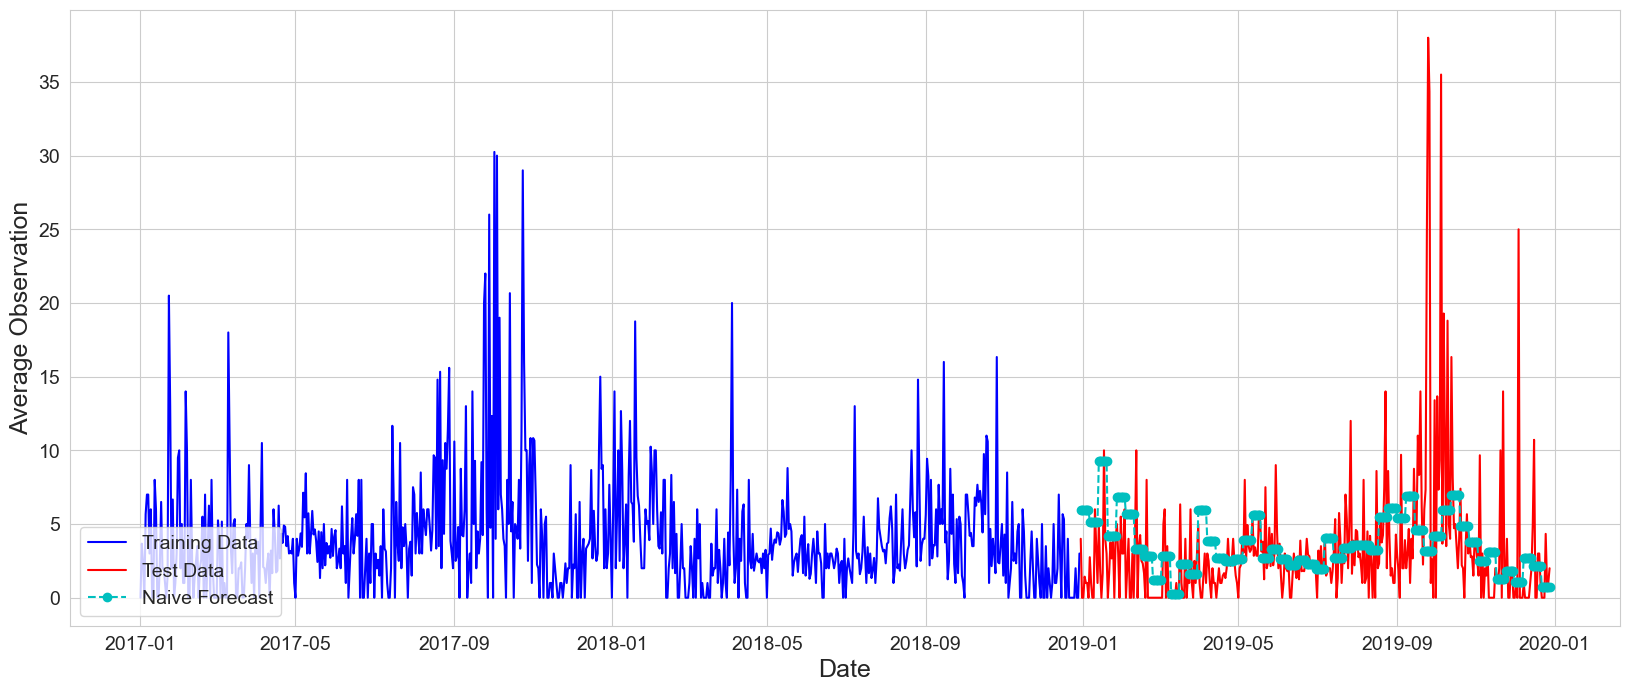

In [11]:
plt.figure(figsize=(20,8))


plt.plot(databd_train.dsreal, 
         databd_train.AVGOBS,
         'b',
         label="Training Data")



plt.plot(databd_test.dsreal, 
         databd_test.AVGOBS,
         'r',
         label="Test Data")



plt.plot(databd_test.dsreal, 
         databd_test['ws'].map(naive_dict),
         'c--o',
         label="Naive Forecast")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Average Observation", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

In [12]:
print("the mse for naive is", np.sum(np.power(databd_test['ws'].map(naive_dict).values, 2))/365)

the mse for naive is 16.597612047801032


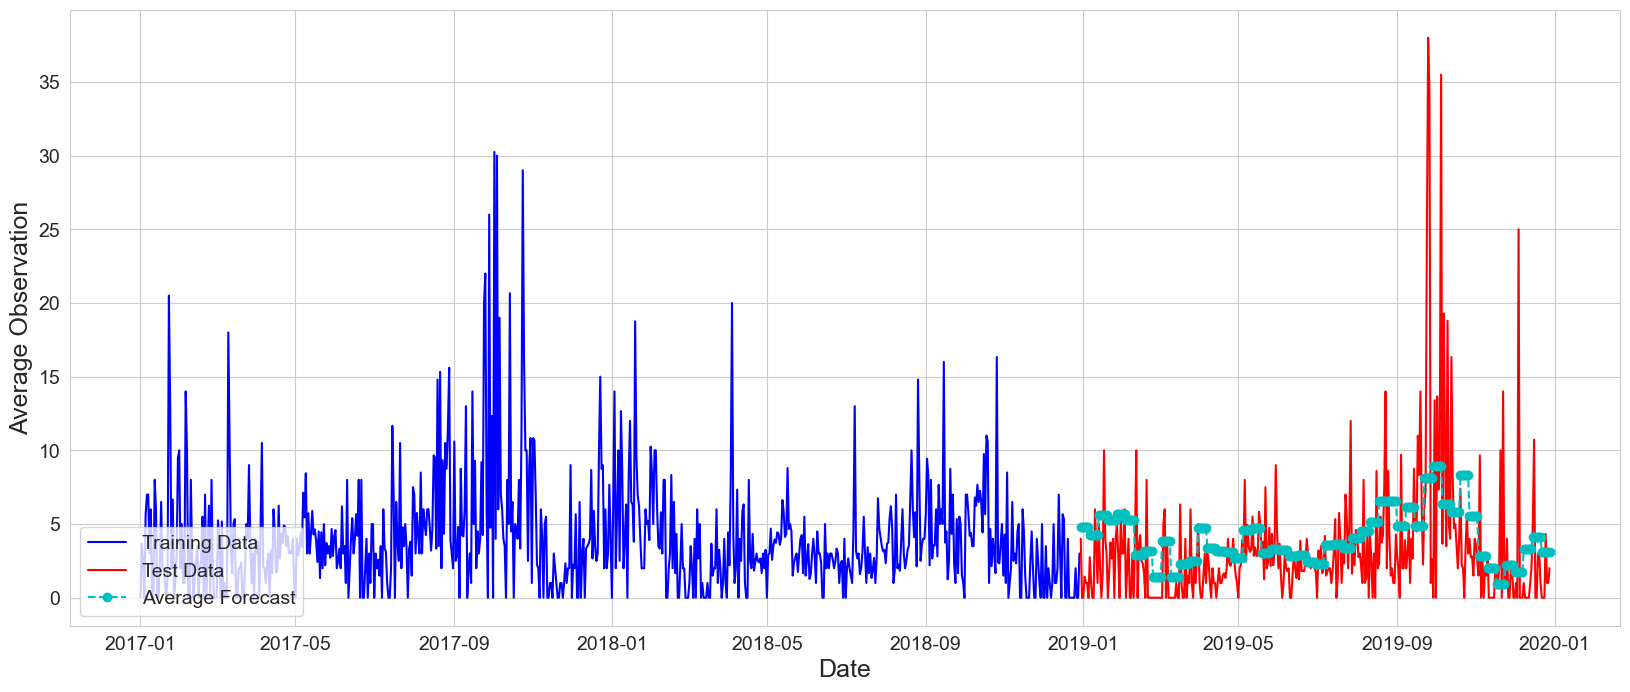

In [13]:
plt.figure(figsize=(20,8))


plt.plot(databd_train.dsreal, 
         databd_train.AVGOBS,
         'b',
         label="Training Data")



plt.plot(databd_test.dsreal, 
         databd_test.AVGOBS,
         'r',
         label="Test Data")



plt.plot(databd_test.dsreal, 
         databd_test['ws'].map(avg_dict),
         'c--o',
         label="Average Forecast")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Average Observation", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

In [14]:
print("the mse for average is", np.sum(np.power(databd_test['ws'].map(avg_dict).values, 2))/365)

the mse for average is 19.649515487988666


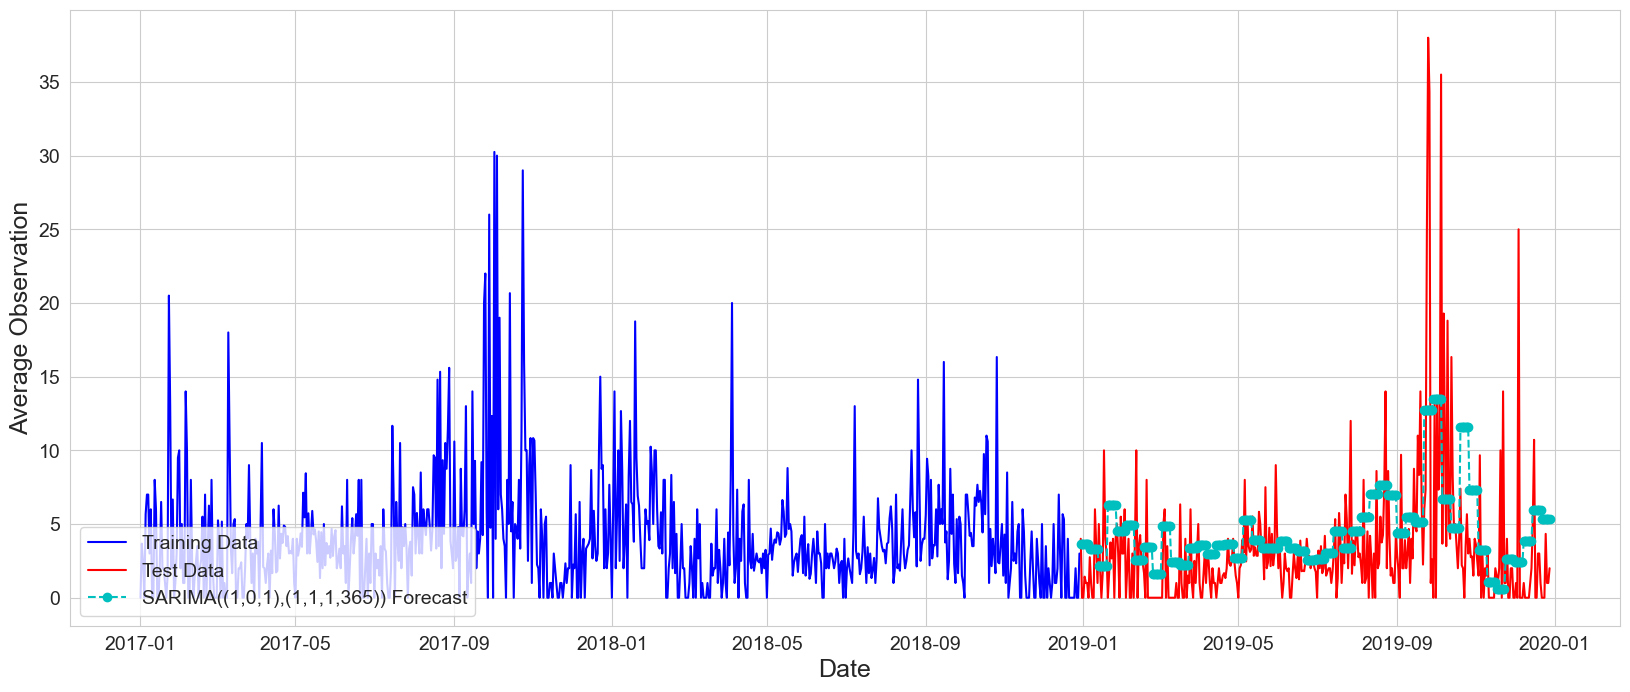

In [15]:
plt.figure(figsize=(20,8))


plt.plot(databd_train.dsreal, 
         databd_train.AVGOBS,
         'b',
         label="Training Data")



plt.plot(databd_test.dsreal, 
         databd_test.AVGOBS,
         'r',
         label="Test Data")



plt.plot(databd_test.dsreal, 
         databd_test['ws'].map(sarima_dict),
         'c--o',
         label="SARIMA((1,0,1),(1,1,1,365)) Forecast")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Average Observation", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

In [16]:
print("the mse for weekly sarima is", np.sum(np.power(databd_test['ws'].map(sarima_dict).values, 2))/365)

the mse for weekly sarima is 26.450606884395974
